Exploratory data analysis for traffic violations in Rhode Island

> Preparing the data - Examine and clean the data

In [110]:
import pandas as pd

police = pd.read_csv('police.csv')
# Locate missing values (Police)
police_missing_values = police.isnull()
print(police_missing_values)
police_missing_values_count = police.isna().sum()
print(police_missing_values_count)
print("---------------------------------------------")

# Drop columns and rows (based on missing value counts)
police = police.drop(columns=['county_name'])
police = police.drop(columns=['search_type'])
police = police.drop(columns=['violation_raw'])
police = police.dropna()

# Examine shape with fewer rows and columns
prows, pcolumns = police.shape
print("Shape of Police dataframe with removed values is ", prows, " x", pcolumns)

display(police)
# Examine and fix incorrect data types
police['driver_gender'] = police['driver_gender'].astype('category')
police['driver_race'] = police['driver_race'].astype('category')
police['stop_outcome'] = police['stop_outcome'].astype('category')
police['stop_duration'] = police['stop_outcome'].astype('category')
police['violation'] = police['violation'].astype('category')
police['district'] = police['district'].astype('category')
police['search_conducted'] = police['search_conducted'].astype('bool')
police['is_arrested'] = police['is_arrested'].astype('bool')
police['drugs_related_stop'] = police['drugs_related_stop'].astype('bool')
print(police.dtypes)

police['stop_datetime'] = pd.to_datetime(police['stop_date'] + " " + police['stop_time'], format='%Y-%m-%d %H:%M')
police = police.drop(['stop_date', 'stop_time'], axis=1)

       state  stop_date  stop_time  county_name  driver_gender  driver_race  \
0      False      False      False         True          False        False   
1      False      False      False         True          False        False   
2      False      False      False         True          False        False   
3      False      False      False         True          False        False   
4      False      False      False         True          False        False   
...      ...        ...        ...          ...            ...          ...   
91736  False      False      False         True          False        False   
91737  False      False      False         True          False        False   
91738  False      False      False         True          False        False   
91739  False      False      False         True          False        False   
91740  False      False      False         True          False        False   

       violation_raw  violation  search_conducted  

,state,stop_date,stop_time,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment,False,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Other,False,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,F,White,Speeding,False,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,F,Black,Moving violation,False,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,F,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,M,White,Moving violation,False,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,F,Hispanic,Equipment,False,Warning,False,0-15 Min,False,Zone K3


state                   object
stop_date               object
stop_time               object
driver_gender         category
driver_race           category
violation             category
search_conducted          bool
stop_outcome          category
is_arrested               bool
stop_duration         category
drugs_related_stop        bool
district              category
dtype: object


<ipython-input-110-974d087e4e69>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police['driver_gender'] = police['driver_gender'].astype('category')
<ipython-input-110-974d087e4e69>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police['driver_race'] = police['driver_race'].astype('category')
<ipython-input-110-974d087e4e69>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

> Examining traffic violations

In [111]:
# Compare violations by gender
display(police.groupby(['violation'])["driver_gender"].value_counts())

# Compare speeding outcomes by gender (percentage of stops as 'Citations' vs. 'Warning')
print("---------------------------------------------")

filtered = police[police.violation == "Speeding"]
df2 = filtered.groupby(['driver_gender'])["stop_outcome"].value_counts()
display(df2)
# # Calculate the percentage of values in each group
# percentages = (counts / filtered.shape[0]) * 100
# result = pd.concat([counts, percentages], axis=1)
# result.columns = ["Count", "Percentage"]
# display(result)

print("---------------------------------------------")

# display(police.groupby(['stop_outcome'])["driver_gender"].value_per())

# Compare the rate of annual drug-related stops for each year,. What is the observed pattern.
police['stop_year'] = pd.to_datetime(police['stop_datetime']).dt.year
display(police.groupby(['stop_year'])['drugs_related_stop'].value_counts())
display("Observation 1: Everyear the number of false drugs related stops is much higher as compared to actual drugs related stops")
display("Observation 2: Everyear as the number of false drugs related stops increases, there is an increase in actual drugs related stops")

# Tally violations by district
del police['stop_year']
display(police.groupby(['violation'])["district"].value_counts())

violation             
Equipment            M     8420
                     F     2501
Moving violation     M    12938
                     F     3286
Other                M     3702
                     F      707
Registration/plates  M     2647
                     F     1056
Seat belt            M     2278
                     F      578
Speeding             M    32777
                     F    15646
Name: driver_gender, dtype: int64

---------------------------------------------


driver_gender                  
F              Citation            14898
               Warning               627
               Arrest Driver          90
               N/D                    15
               Arrest Passenger       10
               No Action               6
M              Citation            30961
               Warning              1186
               Arrest Driver         521
               Arrest Passenger       42
               No Action              35
               N/D                    32
Name: stop_outcome, dtype: int64

---------------------------------------------


stop_year  drugs_related_stop
2005       False                  2445
           True                     16
2006       False                  9985
           True                     73
2007       False                  8962
           True                     72
2008       False                  8199
           True                     62
2009       False                  7109
           True                     71
2010       False                  7070
           True                     72
2011       False                  7632
           True                     75
2012       False                 10279
           True                    103
2013       False                  7462
           True                     99
2014       False                  8559
           True                    120
2015       False                  7972
           True                     99
Name: drugs_related_stop, dtype: int64

'Observation 1: Everyear the number of false drugs related stops is much higher as compared to actual drugs related stops'

'Observation 2: Everyear as the number of false drugs related stops increases, there is an increase in actual drugs related stops'

violation                   
Equipment            Zone X4     3541
                     Zone K3     2302
                     Zone K2     2061
                     Zone X3     2049
                     Zone K1      672
                     Zone X1      296
Moving violation     Zone X4     5353
                     Zone X3     3086
                     Zone K2     2962
                     Zone K3     2898
                     Zone K1     1254
                     Zone X1      671
Other                Zone X4     1560
                     Zone K2      942
                     Zone X3      769
                     Zone K3      705
                     Zone K1      290
                     Zone X1      143
Registration/plates  Zone X4     1411
                     Zone K2      768
                     Zone K3      695
                     Zone X3      671
                     Zone K1      120
                     Zone X1       38
Seat belt            Zone X4      843
                     

Weather Conditions

In [112]:
weather = pd.read_csv('weather.csv')
display(weather)

# Calculate the sum of each row in 'WT'
weather['bad_cond_count'] = weather.loc[:, 'WT01':'WT22'].sum(axis='columns')

# Replace missing values in 'bad_conditions' with 0
weather['bad_cond_count'] = weather.bad_cond_count.fillna(0).astype('int')

print(weather.bad_cond_count.value_counts().sort_index())

# Create a dictionary that maps integers to strings
map = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rate'] = weather.bad_cond_count.map(map)

weather['rate'] = weather['rate'].astype('category')

display(weather)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_cond_count, dtype: int64


,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,bad_cond_count,rate
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,bad
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2,bad
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3,bad
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4,bad
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,bad
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,good
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,bad
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,bad


Merging Weather and Police Dataframes

In [114]:
w_rate = weather[['DATE', 'rate']]

police['stop_datetime'] = pd.to_datetime(police['stop_datetime'])
weather['DATE'] = pd.to_datetime(weather['DATE'])
police['stop_date'] = pd.to_datetime(police['stop_datetime'].dt.date)

police_w_rate = pd.merge(left=police, right=w_rate, left_on='stop_date', right_on='DATE', how='left')
del police_w_rate['stop_date']
del police_w_rate['DATE']

police_w_rate.set_index('stop_datetime', inplace=True)
display(police_w_rate)

,state,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,rate
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,RI,M,White,Equipment,False,Citation,False,Citation,False,Zone X4,bad
2005-01-23 23:15:00,RI,M,White,Speeding,False,Citation,False,Citation,False,Zone K3,worse
2005-02-17 04:15:00,RI,M,White,Speeding,False,Citation,False,Citation,False,Zone X4,good
2005-02-20 17:15:00,RI,M,White,Other,False,Arrest Driver,True,Arrest Driver,False,Zone X1,bad
2005-02-24 01:20:00,RI,F,White,Speeding,False,Citation,False,Citation,False,Zone X3,bad
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,RI,F,Black,Moving violation,False,Citation,False,Citation,False,Zone K2,bad
2015-12-31 21:59:00,RI,F,White,Speeding,False,Citation,False,Citation,False,Zone K3,bad
2015-12-31 22:04:00,RI,M,White,Moving violation,False,Citation,False,Citation,False,Zone X3,bad


Comparison on Merged Datasets

In [115]:
# Compare arrest rates by weather rating
display(police_w_rate.groupby(['rate']).is_arrested.mean())

# Overall arrest rates
display("Overall Arrest Rate:", police_w_rate.is_arrested.mean())

# Calculate arrest rate for each of the weather settings
# Violation as a second factor in the analysis, to account for differences in the arrest rate
display(police_w_rate.groupby(['violation', 'rate']).is_arrested.mean())

display(police_w_rate.groupby(['violation', 'rate']).is_arrested.mean().unstack())

# Create the same DataFrame using a pivot table
print(police_w_rate.pivot_table(index='violation', columns='rate', values='is_arrested'))

rate
bad      0.036261
good     0.033715
worse    0.041667
Name: is_arrested, dtype: float64

'Overall Arrest Rate:'

0.0355690117407784

violation            rate 
Equipment            bad      0.066311
                     good     0.059007
                     worse    0.097357
Moving violation     bad      0.058050
                     good     0.056227
                     worse    0.065860
Other                bad      0.087443
                     good     0.076966
                     worse    0.062893
Registration/plates  bad      0.098160
                     good     0.081574
                     worse    0.115625
Seat belt            bad      0.022493
                     good     0.028587
                     worse    0.000000
Speeding             bad      0.013314
                     good     0.013405
                     worse    0.016886
Name: is_arrested, dtype: float64

rate,bad,good,worse
violation,,,
Equipment,0.066311,0.059007,0.097357
Moving violation,0.058050,0.056227,0.065860
Other,0.087443,0.076966,0.062893
Registration/plates,0.098160,0.081574,0.115625
Seat belt,0.022493,0.028587,0.000000
Speeding,0.013314,0.013405,0.016886


rate                      bad      good     worse
violation                                        
Equipment            0.066311  0.059007  0.097357
Moving violation     0.058050  0.056227  0.065860
Other                0.087443  0.076966  0.062893
Registration/plates  0.098160  0.081574  0.115625
Seat belt            0.022493  0.028587  0.000000
Speeding             0.013314  0.013405  0.016886


Yelp's API Data ingestions 

In [116]:
import requests
import json

api_url = "https://api.yelp.com/v3/businesses/search" 

api_key = "PGk5UX94KykxkNBvCY94kVVcvbWMWWE8tkCCSQgXJKoRuKeuoRDdkpo3NDEkKLUELP8-_4IdR_x9vxbeaIjKke_OxHtcKe9uHgoAOkJtXbO3sBmiS09zVqEDgtfiY3Yx"
# Create dictionary that passes Authorization and key string
headers = {"Authorization": "Bearer {}".format(api_key)}
# Create dictionary for needed API parameters
params = {"location": "OH"}
response = requests.get(api_url, params=params, headers=headers)
display(response)


<Response [200]>

> Load Yelp's Business Listings

In [117]:
data = response.json()
display(data)
print("-----------------------------------------------------")
df = pd.DataFrame(data['businesses'])
display(df)

{'businesses': [{'id': 'V25xzPlcNAtnTi_xzQvr9g',
   'alias': 'brassica-columbus',
   'name': 'Brassica',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/1yx15XzbM4xzPgeVqpgV4A/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/brassica-columbus?adjust_creative=vEISEsRAhC8F0RHe_Gvq_g&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=vEISEsRAhC8F0RHe_Gvq_g',
   'review_count': 1355,
   'categories': [{'alias': 'mediterranean', 'title': 'Mediterranean'},
    {'alias': 'sandwiches', 'title': 'Sandwiches'}],
   'rating': 4.5,
   'coordinates': {'latitude': 39.97638, 'longitude': -83.00294},
   'transactions': ['delivery', 'pickup'],
   'price': '$$',
   'location': {'address1': '680 N High St',
    'address2': None,
    'address3': '',
    'city': 'Columbus',
    'zip_code': '43215',
    'country': 'US',
    'state': 'OH',
    'display_address': ['680 N High St', 'Columbus, OH 43215']},
   'phone': '+16148675885',
   'display_phone': '(614) 867-5

-----------------------------------------------------


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,V25xzPlcNAtnTi_xzQvr9g,brassica-columbus,Brassica,https://s3-media1.fl.yelpcdn.com/bphoto/1yx15X...,False,https://www.yelp.com/biz/brassica-columbus?adj...,1355,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 39.97638, 'longitude': -83.00294}","[delivery, pickup]",$$,"{'address1': '680 N High St', 'address2': None...",+16148675885,(614) 867-5885,1280.356519
1,RW2f2G-u4hxJaTMrmtMUHA,fox-in-the-snow-cafe-columbus-2,Fox In the Snow Cafe,https://s3-media2.fl.yelpcdn.com/bphoto/md49zr...,False,https://www.yelp.com/biz/fox-in-the-snow-cafe-...,1152,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.5,"{'latitude': 39.9841399, 'longitude': -82.99939}",[delivery],$$,"{'address1': '1031 4th St', 'address2': '', 'a...",,,759.208711
2,2qwtLyomP0QHusZvDYMvEw,hot-chicken-takeover-columbus,Hot Chicken Takeover,https://s3-media3.fl.yelpcdn.com/bphoto/vpjnDm...,False,https://www.yelp.com/biz/hot-chicken-takeover-...,1443,"[{'alias': 'southern', 'title': 'Southern'}, {...",4.5,"{'latitude': 39.9716091678141, 'longitude': -8...","[delivery, pickup]",$$,"{'address1': '59 Spruce St', 'address2': None,...",+16148004538,(614) 800-4538,1694.481851
3,pfPRIJTqLGfpTBSmnBAaeA,pistacia-vera-columbus,Pistacia Vera,https://s3-media4.fl.yelpcdn.com/bphoto/MAy-on...,False,https://www.yelp.com/biz/pistacia-vera-columbu...,797,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.5,"{'latitude': 39.951168, 'longitude': -82.995872}",[delivery],$$,"{'address1': '541 S 3rd St', 'address2': '', '...",+16142209070,(614) 220-9070,3534.064656
4,2pNq7ui55i0fVI-jJGjzTw,northstar-café-columbus-5,Northstar Café,https://s3-media3.fl.yelpcdn.com/bphoto/aRvOrR...,False,https://www.yelp.com/biz/northstar-caf%C3%A9-c...,1270,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 39.98154, 'longitude': -83.0046}","[delivery, pickup]",$$,"{'address1': '951 N High St', 'address2': None...",+16142989999,(614) 298-9999,1192.651758
5,vecuat0jOia-CJveW3ngDw,schmidts-sausage-haus-columbus-5,Schmidt's Sausage Haus,https://s3-media2.fl.yelpcdn.com/bphoto/YXCeCK...,False,https://www.yelp.com/biz/schmidts-sausage-haus...,1639,"[{'alias': 'german', 'title': 'German'}]",4.0,"{'latitude': 39.9463, 'longitude': -82.99108}","[delivery, pickup]",$$,"{'address1': '240 E Kossuth St', 'address2': N...",+16144446808,(614) 444-6808,4053.165061
6,qa4SegtG2bWMBhJgWyU7Tw,katalinas-columbus,Katalina's,https://s3-media2.fl.yelpcdn.com/bphoto/GzqPM5...,False,https://www.yelp.com/biz/katalinas-columbus?ad...,1135,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.5,"{'latitude': 39.983716, 'longitude': -83.015735}",[delivery],$$,"{'address1': '1105 Pennsylvania Ave', 'address...",+16142942233,(614) 294-2233,2134.044268
7,E1EAjUxgLrLI6SzFwtCxnA,scottys-cafe-columbus-2,Scotty's Cafe,https://s3-media1.fl.yelpcdn.com/bphoto/AIG10w...,False,https://www.yelp.com/biz/scottys-cafe-columbus...,541,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...",5.0,"{'latitude': 39.9714992218486, 'longitude': -8...",[delivery],$$,"{'address1': '2980 E Broad St', 'address2': ''...",+16142371949,(614) 237-1949,6032.469189
8,PKjPT5D5qXSkNE9TaVw96w,jenis-splendid-ice-creams-columbus-6,Jeni's Splendid Ice Creams,https://s3-media3.fl.yelpcdn.com/bphoto/6W08C9...,False,https://www.yelp.com/biz/jenis-splendid-ice-cr...,560,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 39.97699, 'longitude': -83.00337}","[delivery, pickup]",$$,"{'address1': '714 N High St', 'address2': '', ...",+16142945364,(614) 294-5364,1243.350046
9,uk0EeEv3egyPn-thIABpAg,the-pearl-columbus-3,The Pearl,https://s3-media1.fl.yelpcdn.com/bphoto/LOWCah...,False,https://www.yelp.com/biz/the-pearl-columbus-3?...,1054,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 39.97523583504577, 'longitude': -...",[delivery],$$,"{'address1': '641 N High St', 

In [118]:
import pandas, json
businesses_flat = pandas.json_normalize(data, sep="_")
display(businesses_flat)
categories = pandas.json_normalize(data["businesses"],
                            sep= "_",
                            record_path= "categories",
                            meta=["name", "alias", "rating", ["coordinates", "latitude"], ["coordinates", "longitude"]],
                            meta_prefix="b_")
display(categories)


,businesses,total,region_center_longitude,region_center_latitude
0,"[{'id': 'V25xzPlcNAtnTi_xzQvr9g', 'alias': 'br...",2800,-82.990723,39.982705


,alias,title,b_name,b_alias,b_rating,b_coordinates_latitude,b_coordinates_longitude
0,mediterranean,Mediterranean,Brassica,brassica-columbus,4.5,39.97638,-83.00294
1,sandwiches,Sandwiches,Brassica,brassica-columbus,4.5,39.97638,-83.00294
2,coffee,Coffee & Tea,Fox In the Snow Cafe,fox-in-the-snow-cafe-columbus-2,4.5,39.98414,-82.99939
3,bakeries,Bakeries,Fox In the Snow Cafe,fox-in-the-snow-cafe-columbus-2,4.5,39.98414,-82.99939
4,cafes,Cafes,Fox In the Snow Cafe,fox-in-the-snow-cafe-columbus-2,4.5,39.98414,-82.99939
5,southern,Southern,Hot Chicken Takeover,hot-chicken-takeover-columbus,4.5,39.971609,-83.004354
6,chickenshop,Chicken Shop,Hot Chicken Takeover,hot-chicken-takeover-columbus,4.5,39.971609,-83.004354
7,bakeries,Bakeries,Pistacia Vera,pistacia-vera-columbus,4.5,39.951168,-82.995872
8,desserts,Desserts,Pistacia Vera,pistacia-vera-columbus,4.5,39.951168,-82.995872
9,coffee,Coffee & Tea,Pistacia Vera,pistacia-vera-columbus,4.5,39.951168,-82.995872


Analyzing IoT data

In [120]:
from numpy.lib.function_base import disp
heavy = pd.read_json('traffic_heavy_vehicles.json')
light = pd.read_json('traffic_light_vehicles.json')
env = pd.read_json('environment.json')

display(env)
env['timestamp'] = pd.to_datetime(env['timestamp'])
df = env.resample('60min', on='timestamp').mean()
display("Env------------------------")
display(df)

heavy['timestamp'] = pd.to_datetime(heavy['timestamp'])
df2 = heavy.resample('60min', on='timestamp').mean()
display("Heavy------------------------")
display(df2)
df2 = df2.rename(columns={'value': 'heavy_veh'})


light['timestamp'] = pd.to_datetime(light['timestamp'])
df3 = light.resample('60min', on='timestamp').mean()
display("Light------------------------")
display (df3)
df3 = df3.rename(columns={'value': 'light_veh'})

df4 = pd.merge(df2, df3, on="timestamp")
display(df4)

df5 = pd.merge(df4, df, on="timestamp")
display(df5)

agg_dict = {"temperature": "max", "humidity": "max", "sunshine": "sum", 
            "light_veh": "sum", "heavy_veh": "sum",
            }

# Apply the aggregation dictionary to the dataframe
result = df5.agg(agg_dict)

# Print the result
print(result)


,timestamp,precipitation,humidity,radiation,sunshine,pressure,temperature
0,2018-09-01 00:00:00,0.0,95.6,0.0,599.2,1016.3,16.1
1,2018-09-01 00:05:00,0.1,NaN,NaN,NaN,NaN,NaN
2,2018-09-01 00:10:00,0.0,95.5,0.0,600.0,1016.4,16.1
3,2018-09-01 00:15:00,0.0,NaN,NaN,NaN,NaN,NaN
4,2018-09-01 00:20:00,0.0,95.2,0.0,598.9,1016.5,16.1
...,...,...,...,...,...,...,...
26170,2018-11-30 22:40:00,0.0,92.8,0.0,0.0,1020.8,-0.7
26171,2018-11-30 22:45:00,0.0,NaN,NaN,NaN,NaN,NaN
26172,2018-11-30 22:50:00,0.0,93.0,0.0,0.0,1020.9,-0.7
26173,2018-11-30 22:55:00,0.0,NaN,NaN,NaN,NaN,NaN


'Env------------------------'

,precipitation,humidity,radiation,sunshine,pressure,temperature
timestamp,,,,,,
2018-09-01 00:00:00,0.008333,95.283333,0.000000,599.433333,1016.333333,16.083333
2018-09-01 01:00:00,0.000000,94.266667,0.000000,599.583333,1015.900000,15.783333
2018-09-01 02:00:00,0.000000,94.500000,0.000000,599.850000,1015.883333,15.750000
2018-09-01 03:00:00,0.233333,91.750000,0.000000,599.616667,1016.083333,15.116667
2018-09-01 04:00:00,0.483333,92.466667,0.066667,599.433333,1017.083333,14.216667
...,...,...,...,...,...,...
2018-11-30 19:00:00,0.000000,81.583333,0.000000,0.000000,1020.300000,1.250000
2018-11-30 20:00:00,0.000000,83.750000,0.000000,0.000000,1020.500000,0.833333
2018-11-30 21:00:00,0.000000,87.400000,0.000000,0.000000,1020.566667,0.333333


'Heavy------------------------'

,value
timestamp,
2018-09-01 00:00:00,0.00
2018-09-01 01:00:00,0.00
2018-09-01 02:00:00,0.00
2018-09-01 03:00:00,0.25
2018-09-01 04:00:00,1.25
...,...
2018-11-30 18:00:00,6.00
2018-11-30 19:00:00,3.75
2018-11-30 20:00:00,2.25


'Light------------------------'

,value
timestamp,
2018-09-01 00:00:00,0.00
2018-09-01 01:00:00,0.00
2018-09-01 02:00:00,4.25
2018-09-01 03:00:00,11.25
2018-09-01 04:00:00,20.25
...,...
2018-11-30 18:00:00,75.75
2018-11-30 19:00:00,48.25
2018-11-30 20:00:00,33.00


,heavy_veh,light_veh
timestamp,,
2018-09-01 00:00:00,0.00,0.00
2018-09-01 01:00:00,0.00,0.00
2018-09-01 02:00:00,0.00,4.25
2018-09-01 03:00:00,0.25,11.25
2018-09-01 04:00:00,1.25,20.25
...,...,...
2018-11-30 18:00:00,6.00,75.75
2018-11-30 19:00:00,3.75,48.25
2018-11-30 20:00:00,2.25,33.00


,heavy_veh,light_veh,precipitation,humidity,radiation,sunshine,pressure,temperature
timestamp,,,,,,,,
2018-09-01 00:00:00,0.00,0.00,0.008333,95.283333,0.000000,599.433333,1016.333333,16.083333
2018-09-01 01:00:00,0.00,0.00,0.000000,94.266667,0.000000,599.583333,1015.900000,15.783333
2018-09-01 02:00:00,0.00,4.25,0.000000,94.500000,0.000000,599.850000,1015.883333,15.750000
2018-09-01 03:00:00,0.25,11.25,0.233333,91.750000,0.000000,599.616667,1016.083333,15.116667
2018-09-01 04:00:00,1.25,20.25,0.483333,92.466667,0.066667,599.433333,1017.083333,14.216667
...,...,...,...,...,...,...,...,...
2018-11-30 18:00:00,6.00,75.75,0.000000,81.750000,0.000000,0.000000,1019.816667,1.550000
2018-11-30 19:00:00,3.75,48.25,0.000000,81.583333,0.000000,0.000000,1020.300000,1.250000
2018-11-30 20:00:00,2.25,33.00,0.000000,83.750000,0.000000,0.000000,1020.500000,0.833333


temperature        30.033333
humidity          100.050000
sunshine       409448.733333
light_veh      100551.000000
heavy_veh        7854.000000
dtype: float64


Correlation & Data Visualization

,heavy_veh,light_veh,precipitation,humidity,radiation,sunshine,pressure,temperature
heavy_veh,1.000000,0.997889,-0.026281,-0.374550,0.436224,0.337254,-0.085077,0.262150
light_veh,0.997889,1.000000,-0.023372,-0.372301,0.437021,0.337366,-0.085360,0.259922
precipitation,-0.026281,-0.023372,1.000000,0.154868,-0.083732,-0.062387,-0.314113,-0.054787
humidity,-0.374550,-0.372301,0.154868,1.000000,-0.590995,-0.525329,-0.015162,-0.631013
radiation,0.436224,0.437021,-0.083732,-0.590995,1.000000,0.757456,0.027693,0.520149
sunshine,0.337254,0.337366,-0.062387,-0.525329,0.757456,1.000000,0.014091,0.547977
pressure,-0.085077,-0.085360,-0.314113,-0.015162,0.027693,0.014091,1.000000,-0.137211
temperature,0.262150,0.259922,-0.054787,-0.631013,0.520149,0.547977,-0.137211,1.000000


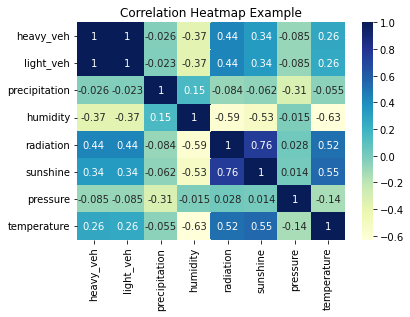

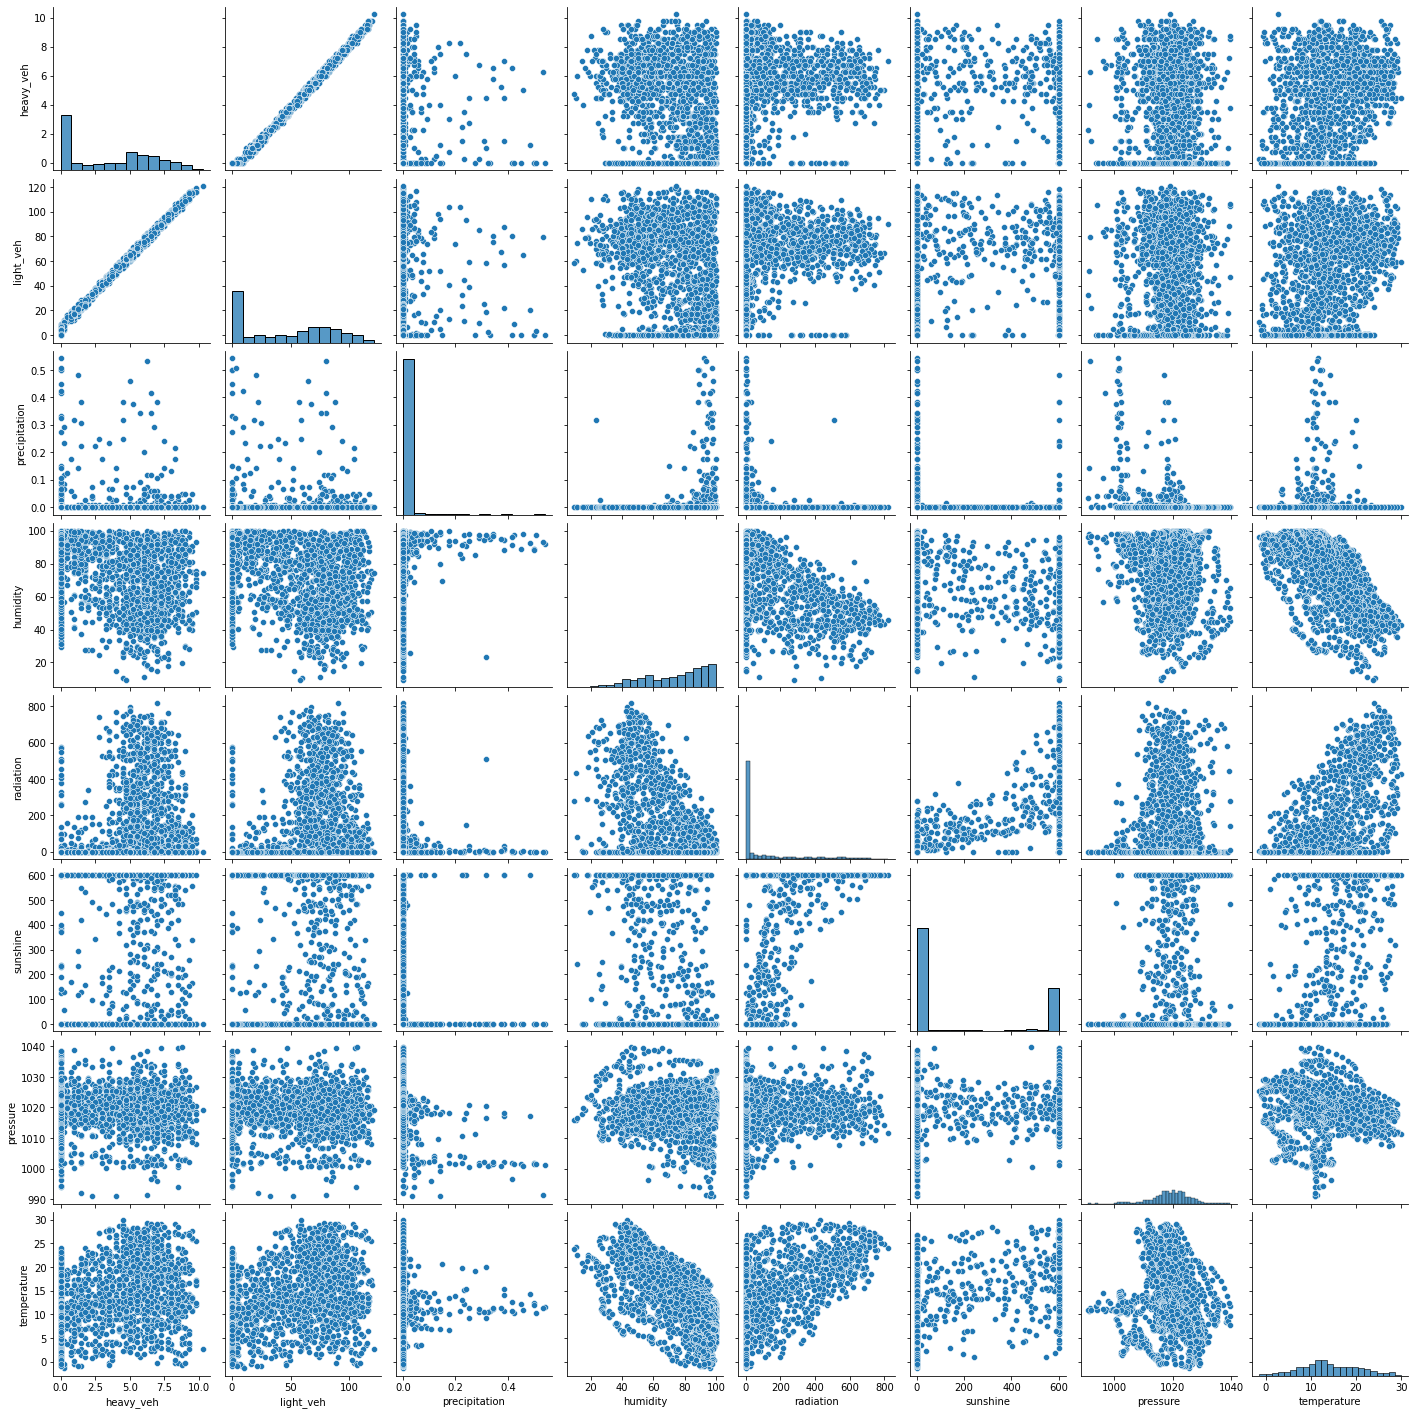

In [121]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the pairwise correlation between the features of the dataset
corr = df5.corr()
display(corr)
# Plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap='YlGnBu');
# Add title and adjust figure size
plt.title('Correlation Heatmap Example')
# Show the plot
plt.show();

# Plot the pair plot
sns.pairplot(df5)
# Show the plot
plt.show()

**Observations from Heatmap**

Following features have a positive relationship with each other (when one variable increases, the other variable also increases). This is because there is a positive integer value in the Heatmap's square corresonding to the following pairs. 

  > Heavy_weg: sunshine, radiation

  > light_weg: sunshine, radiation

  > Precipitation: humidity

  > Radiation: pressure, temperature

  > Sunshine: pressure, temperature, radiation

Note: All features with themselves also has a positive relationship. For example, the pair (precipitation, precipitation) has a value 1 in the Heatmap.

Other remaining pairs of features have a negative relationship with each other (when one variable increases, the other variable decreases). This is because there is a negative integer value in the Heatmap's square corresonding to the following pairs

**Observations from Pairplot**

Above pairplot provides information about pairwise relationships of various features in the dataset. For instance, in the above pairplot


1.   There is a linear relationship between light_weigh and heavy_weigh features
2.   There is a inverse relationship between precipitation and radiation features



In [ ]:
from google.colab import drive
drive.mount('/content/drive')